In [24]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # for data visualization purposes
from scipy import stats
import seaborn as sns
from IPython.display import Image
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
%matplotlib inline
sns.set_style("darkgrid")


IMPORT DATASET


In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)
dataset.head(10)


,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


EXPLORATORY DATA ANALYSIS (EDA)


<AxesSubplot:>

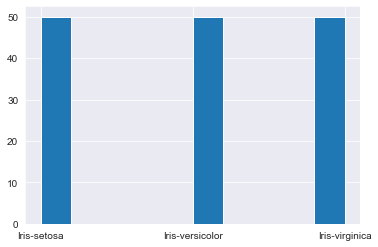

In [3]:
dataset["Class"].hist()


CHECK WHETHER THE FEATURES ARE DEPENDENT OR NOT
For Naive Bayes Classifier, the assumption is that the features are independent.


<AxesSubplot:>

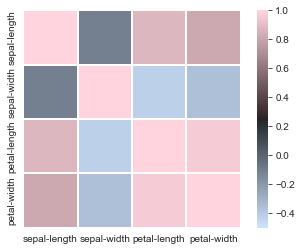

In [4]:
corr = dataset.iloc[:, :-1].corr(method="pearson")
cmap = sns.diverging_palette(250, 360, 150, 90, center='dark', as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)
# negative correlative - positive correlative


In [5]:
dataset = dataset[['sepal-length', 'sepal-width', 'petal-width', 'Class']]
dataset.head(10)


,sepal-length,sepal-width,petal-width,Class
0,5.1,3.5,0.2,Iris-setosa
1,4.9,3.0,0.2,Iris-setosa
2,4.7,3.2,0.2,Iris-setosa
3,4.6,3.1,0.2,Iris-setosa
4,5.0,3.6,0.2,Iris-setosa
5,5.4,3.9,0.4,Iris-setosa
6,4.6,3.4,0.3,Iris-setosa
7,5.0,3.4,0.2,Iris-setosa
8,4.4,2.9,0.2,Iris-setosa
9,4.9,3.1,0.1,Iris-setosa


CHECK THE DISTRIBUTION OF THE FEATURES  
Compare the features distribution graph to normal distribution graph


<AxesSubplot:xlabel='petal-width', ylabel='Count'>

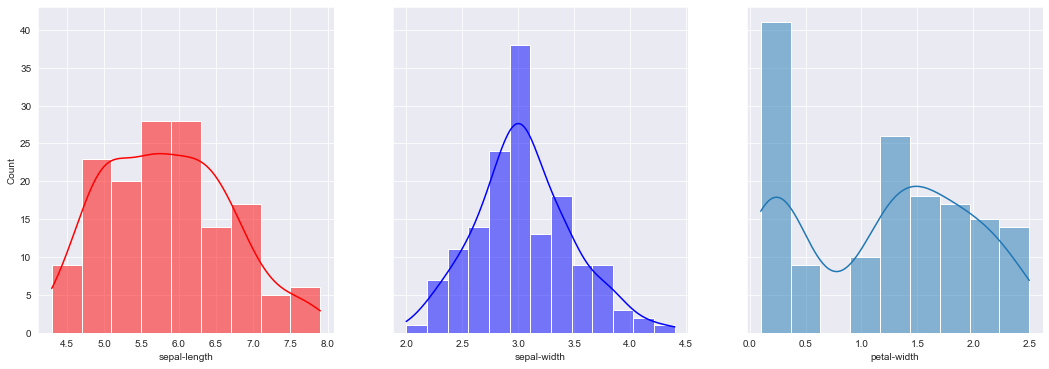

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(dataset, ax=axes[0], x="sepal-length", kde=True, color='r')
sns.histplot(dataset, ax=axes[1], x="sepal-width", kde=True, color='b')
sns.histplot(dataset, ax=axes[2], x="petal-width", kde=True)


In [18]:
X= dataset.drop(['Class'], axis=1)
y=dataset['Class']

TEST GAUSSIAN MODEL

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid= train_test_split(X, y, test_size=0.2, random_state=6)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

In [25]:
#Gaussian NB classifier
gnb = GaussianNB()

In [26]:
#perform the training and prediction
gnb.fit(X_train, y_train)
y_pred_gnb=gnb.predict(X_valid)

Gaussian NB Classifier Accuracy Score:  0.9333333333333333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.82      0.90        11

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



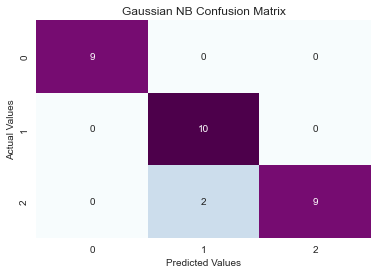

In [27]:
print('Gaussian NB Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_gnb))
cm_rfc=my_confusion_matrix(y_valid, y_pred_gnb, 'Gaussian NB Confusion Matrix')